In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
dataset = pd.read_csv('/content/drive/MyDrive/AirPassengers.csv', usecols=[1] )


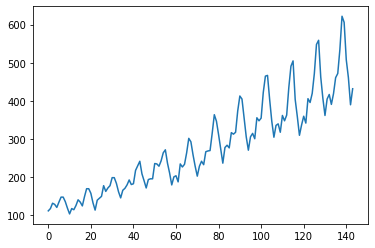

In [ ]:
plt.plot(dataset)
plt.show()

In [ ]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
	
# fix random seed for reproducibility
numpy.random.seed(7)

In [ ]:

# load the dataset
dataframe = pandas.read_csv('/content/drive/MyDrive/AirPassengers.csv', usecols=[1], engine='python')
dataset = dataframe.values #Convert into Array
dataset = dataset.astype('float32')  #convert array integer values to Float values as NN works better with Float Values

LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. We can easily normalize the dataset using the MinMaxScaler preprocessing class

In [ ]:

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


For a normal classification or regression problem, we can check the PERFORMANCE of the Model on UNSEEN DATA using cross validation.
With time series data, the SEQUENCE OF VALUES is important.
So to split the data into TRAINING and TESTING , we can split them by INDEX . first 67 or 70% of training data and remaining 33 or 30% of Test Data.


In [ ]:

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))


96 48


#You want to create a Dataset like this 
First Column as X:		

112
118
132
129
121	

2nd column Y , should consist of these values:

118
132
129
121	135


In [ ]:

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:

# reshape into X=t and Y=t+1
look_back = 4
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
trainY

array([0.03281853, 0.05984557, 0.08494207, 0.08494207, 0.06177607,
       0.02895753, 0.        , 0.02702703, 0.02123553, 0.04247104,
       0.07142857, 0.05984557, 0.04054055, 0.08687258, 0.12741312,
       0.12741312, 0.10424709, 0.05598456, 0.01930502, 0.06949806,
       0.07915059, 0.08880308, 0.14285713, 0.11389962, 0.13127413,
       0.14285713, 0.18339768, 0.18339768, 0.15444016, 0.11196911,
       0.08108109, 0.1196911 , 0.12934363, 0.14671814, 0.17181468,
       0.14864865, 0.15250966, 0.22007722, 0.24324325, 0.26640925,
       0.2027027 , 0.16795367, 0.13127413, 0.17374519, 0.17760617,
       0.17760617, 0.25482625, 0.25289574, 0.24131274, 0.26833975,
       0.3088803 , 0.32432434, 0.25675675, 0.20656371, 0.14671814,
       0.18725869, 0.19305018, 0.16216215, 0.25289574, 0.23745173,
       0.25096524, 0.3088803 , 0.38223937, 0.36486486, 0.2992278 ,
       0.24131274, 0.1911197 , 0.24131274, 0.26640925, 0.24903473,
       0.31467178, 0.3185328 , 0.32046333, 0.4073359 , 0.50193

The LSTM network expects the input data (X) to be provided with a specific array structure in the form of:

[samples, time steps, features]

Currently, our data is in the form:

 [samples, features]

 So use  numpy.reshape()


In [ ]:

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))



In [ ]:
trainX

array([[[0.01544401, 0.02702703, 0.05405405, 0.04826255]],

       [[0.02702703, 0.05405405, 0.04826255, 0.03281853]],

       [[0.05405405, 0.04826255, 0.03281853, 0.05984557]],

       [[0.04826255, 0.03281853, 0.05984557, 0.08494207]],

       [[0.03281853, 0.05984557, 0.08494207, 0.08494207]],

       [[0.05984557, 0.08494207, 0.08494207, 0.06177607]],

       [[0.08494207, 0.08494207, 0.06177607, 0.02895753]],

       [[0.08494207, 0.06177607, 0.02895753, 0.        ]],

       [[0.06177607, 0.02895753, 0.        , 0.02702703]],

       [[0.02895753, 0.        , 0.02702703, 0.02123553]],

       [[0.        , 0.02702703, 0.02123553, 0.04247104]],

       [[0.02702703, 0.02123553, 0.04247104, 0.07142857]],

       [[0.02123553, 0.04247104, 0.07142857, 0.05984557]],

       [[0.04247104, 0.07142857, 0.05984557, 0.04054055]],

       [[0.07142857, 0.05984557, 0.04054055, 0.08687258]],

       [[0.05984557, 0.04054055, 0.08687258, 0.12741312]],

       [[0.04054055, 0.08687258, 0.12741

In [ ]:
# create and fit the LSTM network

model = Sequential()
# a hidden layer with 4 LSTM blocks or neurons
model.add(LSTM(4, input_shape=(1, look_back)))
# an output layer that makes a SINGLE value prediction
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
91/91 - 1s - loss: 0.0568
Epoch 2/100
91/91 - 0s - loss: 0.0228
Epoch 3/100
91/91 - 0s - loss: 0.0135
Epoch 4/100
91/91 - 0s - loss: 0.0114
Epoch 5/100
91/91 - 0s - loss: 0.0099
Epoch 6/100
91/91 - 0s - loss: 0.0086
Epoch 7/100
91/91 - 0s - loss: 0.0075
Epoch 8/100
91/91 - 0s - loss: 0.0067
Epoch 9/100
91/91 - 0s - loss: 0.0060
Epoch 10/100
91/91 - 0s - loss: 0.0055
Epoch 11/100
91/91 - 0s - loss: 0.0050
Epoch 12/100
91/91 - 0s - loss: 0.0047
Epoch 13/100
91/91 - 0s - loss: 0.0045
Epoch 14/100
91/91 - 0s - loss: 0.0043
Epoch 15/100
91/91 - 0s - loss: 0.0044
Epoch 16/100
91/91 - 0s - loss: 0.0041
Epoch 17/100
91/91 - 0s - loss: 0.0040
Epoch 18/100
91/91 - 0s - loss: 0.0041
Epoch 19/100
91/91 - 0s - loss: 0.0040
Epoch 20/100
91/91 - 0s - loss: 0.0040
Epoch 21/100
91/91 - 0s - loss: 0.0040
Epoch 22/100
91/91 - 0s - loss: 0.0038
Epoch 23/100
91/91 - 0s - loss: 0.0038
Epoch 24/100
91/91 - 0s - loss: 0.0037
Epoch 25/100
91/91 - 0s - loss: 0.0037
Epoch 26/100
91/91 - 0s - loss: 0.

In [ ]:

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)

trainY = scaler.inverse_transform([trainY])

testPredict = scaler.inverse_transform(testPredict)

testY = scaler.inverse_transform([testY])




In [ ]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.90 RMSE
Test Score: 48.11 RMSE


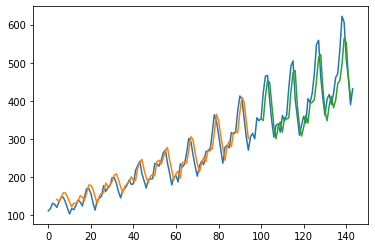

In [ ]:

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

#LSTM for Regression Using the Window Method

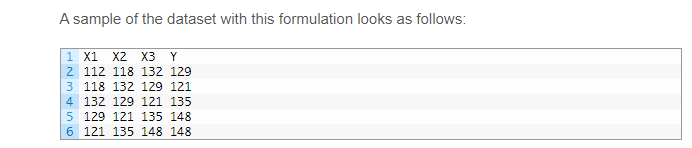

Epoch 1/100
92/92 - 1s - loss: 0.0466
Epoch 2/100
92/92 - 0s - loss: 0.0203
Epoch 3/100
92/92 - 0s - loss: 0.0129
Epoch 4/100
92/92 - 0s - loss: 0.0110
Epoch 5/100
92/92 - 0s - loss: 0.0100
Epoch 6/100
92/92 - 0s - loss: 0.0088
Epoch 7/100
92/92 - 0s - loss: 0.0080
Epoch 8/100
92/92 - 0s - loss: 0.0071
Epoch 9/100
92/92 - 0s - loss: 0.0066
Epoch 10/100
92/92 - 0s - loss: 0.0062
Epoch 11/100
92/92 - 0s - loss: 0.0059
Epoch 12/100
92/92 - 0s - loss: 0.0055
Epoch 13/100
92/92 - 0s - loss: 0.0052
Epoch 14/100
92/92 - 0s - loss: 0.0052
Epoch 15/100
92/92 - 0s - loss: 0.0050
Epoch 16/100
92/92 - 0s - loss: 0.0049
Epoch 17/100
92/92 - 0s - loss: 0.0049
Epoch 18/100
92/92 - 0s - loss: 0.0049
Epoch 19/100
92/92 - 0s - loss: 0.0047
Epoch 20/100
92/92 - 0s - loss: 0.0047
Epoch 21/100
92/92 - 0s - loss: 0.0046
Epoch 22/100
92/92 - 0s - loss: 0.0045
Epoch 23/100
92/92 - 0s - loss: 0.0045
Epoch 24/100
92/92 - 0s - loss: 0.0044
Epoch 25/100
92/92 - 0s - loss: 0.0043
Epoch 26/100
92/92 - 0s - loss: 0.

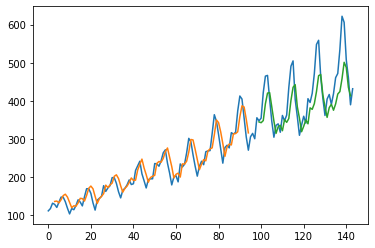

In [ ]:

# LSTM for international airline passengers problem with window regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = pandas.read_csv('/content/drive/MyDrive/AirPassengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

#Note: The results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

#LSTM for Regression with Time Steps

Time steps provide another way to phrase our time series problem. Like above in the window example, we can take prior time steps in our time series as inputs to predict the output at the next time step.

Instead of phrasing the past observations as separate input features, we can use them as time steps of the one input feature, which is indeed a more accurate framing of the problem.

Epoch 1/100
92/92 - 1s - loss: 0.0416
Epoch 2/100
92/92 - 0s - loss: 0.0176
Epoch 3/100
92/92 - 0s - loss: 0.0144
Epoch 4/100
92/92 - 0s - loss: 0.0126
Epoch 5/100
92/92 - 0s - loss: 0.0108
Epoch 6/100
92/92 - 0s - loss: 0.0088
Epoch 7/100
92/92 - 0s - loss: 0.0073
Epoch 8/100
92/92 - 0s - loss: 0.0059
Epoch 9/100
92/92 - 0s - loss: 0.0049
Epoch 10/100
92/92 - 0s - loss: 0.0044
Epoch 11/100
92/92 - 0s - loss: 0.0043
Epoch 12/100
92/92 - 0s - loss: 0.0043
Epoch 13/100
92/92 - 0s - loss: 0.0041
Epoch 14/100
92/92 - 0s - loss: 0.0042
Epoch 15/100
92/92 - 0s - loss: 0.0040
Epoch 16/100
92/92 - 0s - loss: 0.0041
Epoch 17/100
92/92 - 0s - loss: 0.0041
Epoch 18/100
92/92 - 0s - loss: 0.0040
Epoch 19/100
92/92 - 0s - loss: 0.0040
Epoch 20/100
92/92 - 0s - loss: 0.0039
Epoch 21/100
92/92 - 0s - loss: 0.0039
Epoch 22/100
92/92 - 0s - loss: 0.0040
Epoch 23/100
92/92 - 0s - loss: 0.0039
Epoch 24/100
92/92 - 0s - loss: 0.0039
Epoch 25/100
92/92 - 0s - loss: 0.0039
Epoch 26/100
92/92 - 0s - loss: 0.

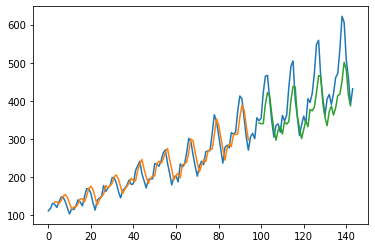

In [ ]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = pandas.read_csv('/content/drive/MyDrive/AirPassengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()